# Homework: Mean Sea Level Time Series Analysis
### Author: Javed Ali
*Date: 23 September 2020*

In [1]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.filters.hp_filter import hpfilter

%matplotlib inline

import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels

import scipy.stats as st
import scipy.io as sio
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from datetime import datetime

# a.) Calculate the linear trend (in $mm/year$) and 99% confidence interval for the entire data record

In [2]:
# Load the time series data
data = pd.read_excel("Sea level data/Mumbai_India.xlsx", 
                               header=0, 
                               index_col=[0],
                               parse_dates=[0])

In [3]:
t = data.index.values #time
s = data['sea_level'] #sea level
L = len(data)

In [4]:
# Check the time series data
data.head()

,sea_level
time,
1878.0416,6892
1878.1250,6974
1878.2084,6974
1878.2916,6998
1878.3750,7020


In [5]:
# Summary of the data
data.describe(percentiles=[0.99, 0.25, 0.50, 0.75, 0.90])

,sea_level
count,1392.000000
mean,7013.291667
std,63.506112
min,6831.000000
25%,6971.000000
50%,7016.000000
75%,7056.000000
90%,7093.000000
99%,7160.000000
max,7216.000000


### Plotting the original time series data

In [203]:
# Plot the original time series data

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.index.values, 
    y=data.sea_level, 
    line_color='deepskyblue'))

fig.update_layout(
    template = "plotly_white",
    title_text="Original Mean Sea Level Time Series",
    xaxis_rangeslider_visible=True)

fig.update_xaxes(title_text="Time (Years)")
fig.update_yaxes(title_text="Mean Sea Level")

fig.show()

In [7]:
# Create a matrix with the time information (t is years)
matrix = (t, np.ones((L,1)))

# Build a model based on y = ax + b + Error
t_mean= np.mean(t)
s_mean= np.mean(s)

In [8]:
t_mean, s_mean

(1936.0, 7013.291666666667)

### METHOD 1: Linear regression fit using `Numpy's polynomial fit` function

The linear parameters are, a = 0.6790348891892354 b = 5698.680121196309


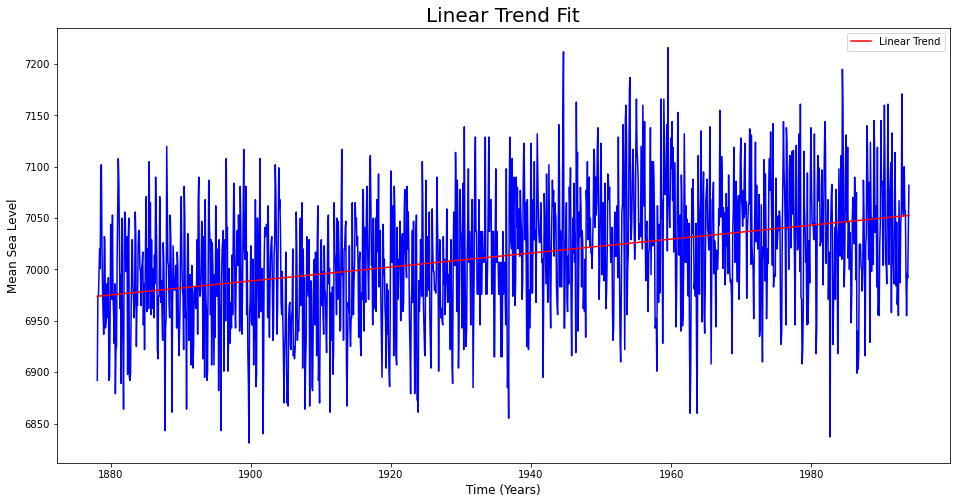

In [202]:
# Numpy's polynomial fit function
parameters = np.polyfit(data.index.values, data['sea_level'], deg = 1) #Linear trend is a polynomial of degree 1
(a,b) = parameters
trend = a*data.index.values + b
print('The linear parameters are, a =', a, 'b =', b)

fig = plt.figure(figsize=(16,8))
plt.plot(data.index.values, data['sea_level'], color='blue')
plt.plot(data.index.values, trend, label='Linear Trend', color ='red')
plt.legend(loc='best')

plt.xlabel("Time (Years)", fontsize=12)
plt.ylabel("Mean Sea Level", fontsize=12)
plt.title("Linear Trend Fit", fontsize=20)

plt.show()

In [10]:
print(trend)

[6973.93589095 6973.99252245 6974.04915396 ... 7052.53417937 7052.59081088
 7052.64744239]


### METHOD 2: Least Squares trend fit using `Numpy`

Least Squares parameters are, m = 0.6790348891892363 c = 5698.680121196305


Text(0.5, 1.0, 'Least Squares Trend Fit')

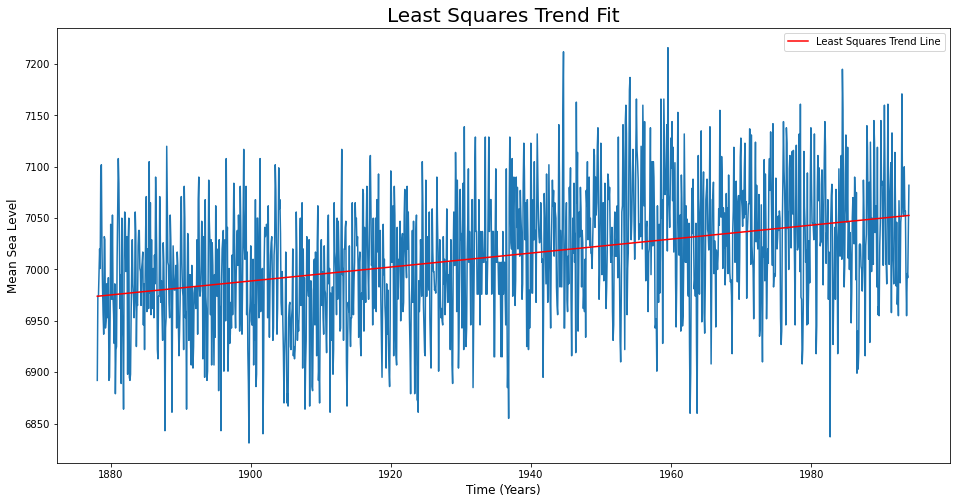

In [207]:
# METHOD 2: Least Squares trend

#Rewrite the line equation as y = Ap, where A = [[x 1]] and p = [[m], [c]]

A = np.vstack([data.index.values, np.ones(L)]).T
m,c = np.linalg.lstsq(A,data['sea_level'], rcond=None)[0]
print('Least Squares parameters are, m =', m, 'c =', c)

line = m*data.index.values+c

fig = plt.figure(figsize=(16,8))
plt.plot(data.index.values, data['sea_level'])
plt.plot(data.index.values, line, label='Least Squares Trend Line', color='red')
plt.legend(loc='best')

plt.xlabel("Time (Years)", fontsize=12)
plt.ylabel("Mean Sea Level", fontsize=12)
plt.title("Least Squares Trend Fit", fontsize=20)

In [12]:
print(line)

[6973.93589095 6973.99252245 6974.04915396 ... 7052.53417937 7052.59081088
 7052.64744239]


### METHOD 3: Ordinary Least Square (OLS) trend fit using `plotly`

In [13]:
# Method 2.1: OLS trend fit

fig = px.scatter(data, x=data.index.values, y=data["sea_level"], trendline="ols", trendline_color_override='red', 
                 labels={"x": "Time (Years)",  "sea_level": "Mean Sea Level"})

fig.update_layout(title='Ordinary Least Square (OLS) Trend Fit')

fig.show()

In [14]:
# Check the results of OLS trend fit
results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        10:07:58   Log-Likelihood:                -7657.5
No. Observations:                1392   AIC:                         1.532e+04
Df Residuals:                    1390   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5698.6801     91.926     61.992      0.000    5518.351    5879.010
x1             0.6790      0.047     14.303      0.000       0.586       0.772
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.609
Skew:                          -0.075   Prob(JB):                        0.271
Kurtosis:                       2.851   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### METHOD 4: Ordinary Least Squares (OLS) linear regression trend fit using `statsmodels`

In [15]:
# Ordinary Least Squares (OLS) linear regression model 

Y = data['sea_level']
X = data.index.values
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sea_level   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        10:16:33   Log-Likelihood:                -7657.5
No. Observations:                1392   AIC:                         1.532e+04
Df Residuals:                    1390   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5698.6801     91.926     61.992      0.000    5518.351    5879.010
x1             0.6790      0.047     14.303      0.000       0.586       0.772
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.609
Skew:                          -0.075   Prob(JB):                        0.271
Kurtosis:                       2.851   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculate confidence intervals (CI)

In [18]:
# define response variable
y = data['sea_level']

#define predictor variables
x = data.index.values

# add constant to predictor variables
x = sm.add_constant(x)

# fit OLS linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

# Calculate 99% confidence interval
model.conf_int(0.01)

                            OLS Regression Results                            
Dep. Variable:              sea_level   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        10:16:38   Log-Likelihood:                -7657.5
No. Observations:                1392   AIC:                         1.532e+04
Df Residuals:                    1390   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5698.6801     91.926     61.992      0.0

,0,1
const,5461.567628,5935.792615
x1,0.556578,0.801492


# b. Calculate the acceleration (in $mm/year^2$) for the entire data record (note that acceleration is defined as twice the quadratic coefficient!)

### Quadratic trend using `Numpy's polyfit` function

Quadratic trend is a polynomial of degree 2: $ax^2 + bx + c$

The acceleration of the sea level rise in Mumbai is -0.0025770161867270584 mm/yr^2
The quadratic parameters are [-1.28850809e-03  5.66813823e+00  8.70672937e+02]


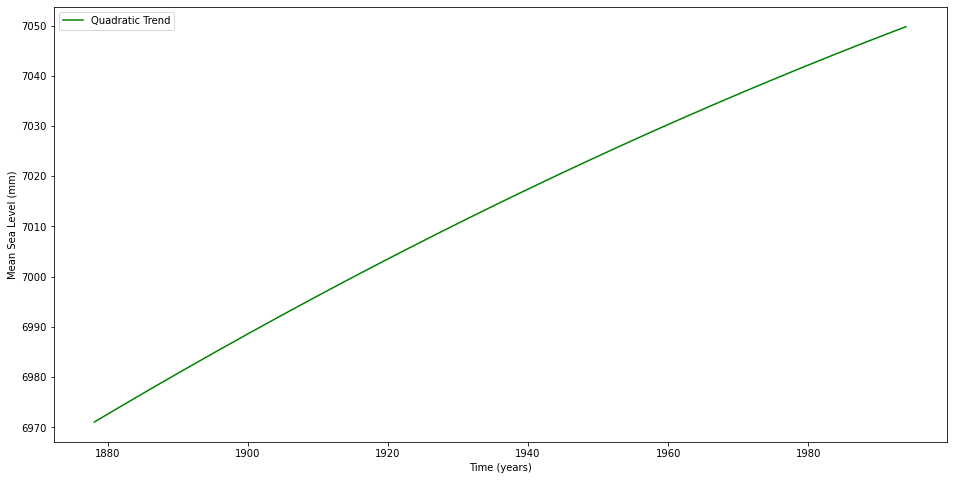

In [20]:
# Quadratic trend 
para_quad = np.polyfit(t,s, deg = 2) 
(aq,bq,cq) = para_quad
acceleration = 2*aq
print('The acceleration of the sea level rise in Mumbai is', acceleration, 'mm/yr^2')

quad_trend = aq*(t**2) + bq*t +cq
print('The quadratic parameters are', para_quad)

f = plt.figure(figsize=(16,8))

#plt.plot(data.index.values, data['sea_level'], label='Original', color='grey')

plt.plot(t, quad_trend, label ='Quadratic Trend', color='green')
plt.xlabel('Time (years)')
plt.ylabel('Mean Sea Level (mm)')
plt.legend()

plt.show()

The quadratic equation is: 
            2
-0.001289 x + 5.668 x + 870.7


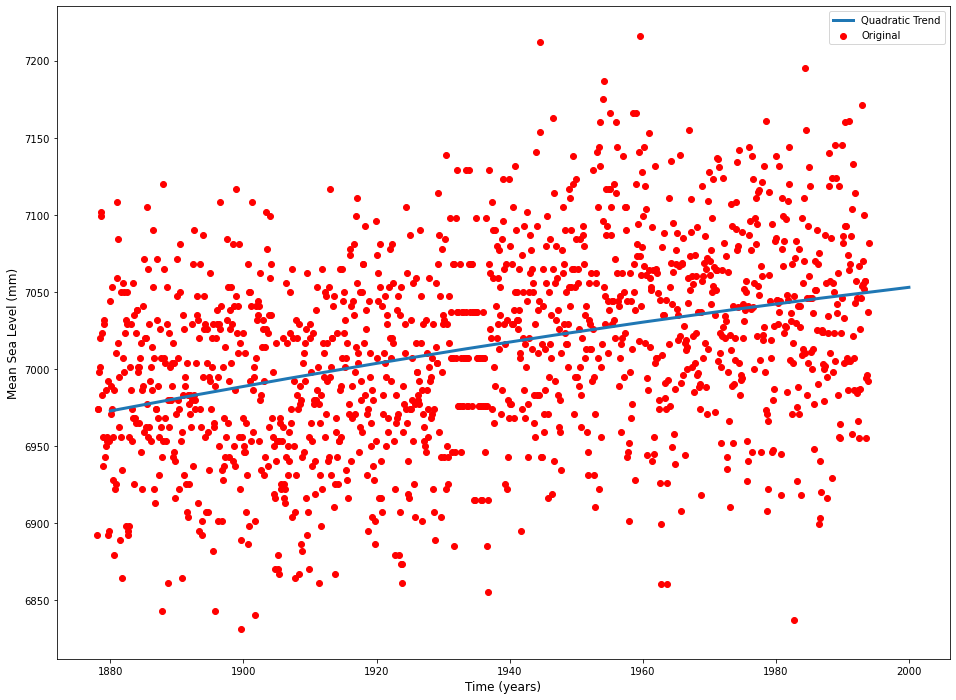

In [21]:
#polynomial fit with degree = 2 (Quadratic fit)
model = np.poly1d(np.polyfit(data.index.values, data["sea_level"], 2))

print('The quadratic equation is: \n', model)

#add fitted polynomial line to scatterplot
f = plt.figure(figsize=(16, 12))
polyline = np.linspace(1880, 2000, 10)
plt.scatter(data.index.values, data["sea_level"], color="red", label='Original')
plt.plot(polyline, model(polyline), label='Quadratic Trend', linewidth=3)

plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Mean Sea Level (mm)', fontsize=12)
plt.legend(loc='best')
plt.show()

# c.) Calculate the linear trends (in $mm/year$) for the first and second halves of the time series

In [22]:
#first half of the time series
data_1 = data.iloc[0:696, 0:1]

In [23]:
t1 = data_1.index.values
s1 = data_1['sea_level']

(a1, b1) = np.polyfit(t1, s1, deg=1)
trend1 = a1*t1 + b1

print('The linear trend from 1878-1935 is', a1, 'mm/year')

The linear trend from 1878-1935 is 0.3329869469962125 mm/year


In [24]:
print(trend1)

[6979.69056413 6979.71833524 6979.74610635 6979.77381086 6979.80158198
 6979.82935309 6979.8570576  6979.88482871 6979.91259982 6979.94030434
 6979.96807545 6979.99584656 6980.02355107 6980.05132219 6980.0790933
 6980.10679781 6980.13456892 6980.16234003 6980.19004455 6980.21781566
 6980.24558677 6980.27329128 6980.3010624  6980.32883351 6980.35653802
 6980.38430913 6980.41208024 6980.43978476 6980.46755587 6980.49532698
 6980.52303149 6980.55080261 6980.57857372 6980.60627823 6980.63404934
 6980.66182045 6980.68952497 6980.71729608 6980.74506719 6980.77277171
 6980.80054282 6980.82831393 6980.85601844 6980.88378955 6980.91156066
 6980.93926518 6980.96703629 6980.9948074  6981.02251192 6981.05028303
 6981.07805414 6981.10575865 6981.13352976 6981.16130087 6981.18900539
 6981.2167765  6981.24454761 6981.27225213 6981.30002324 6981.32779435
 6981.35549886 6981.38326997 6981.41104109 6981.4387456  6981.46651671
 6981.49428782 6981.52199234 6981.54976345 6981.57753456 6981.60523907
 6981.6

In [25]:
#second half of the time series
data_2 = data.iloc[696:1393, 0:1]

t2 = data_2.index.values
s2 = data_2['sea_level']

(a2, b2) = np.polyfit(t2, s2, deg=1)
trend2 = a2*t2 + b2

print('The linear trend from 1936-1993 is', a2, 'mm/year')

The linear trend from 1936-1993 is 0.1423938159552079 mm/year


In [26]:
print(trend2)

[7033.12650292 7033.13837856 7033.15025421 7033.16210137 7033.17397702
 7033.18585266 7033.19769983 7033.20957547 7033.22145112 7033.23329828
 7033.24517393 7033.25704957 7033.26889674 7033.28077238 7033.29264802
 7033.30449519 7033.31637083 7033.32824648 7033.34009364 7033.35196929
 7033.36384493 7033.3756921  7033.38756774 7033.39944339 7033.41129055
 7033.4231662  7033.43504184 7033.44688901 7033.45876465 7033.47064029
 7033.48248746 7033.4943631  7033.50623875 7033.51808591 7033.52996156
 7033.5418372  7033.55368437 7033.56556001 7033.57743566 7033.58928282
 7033.60115847 7033.61303411 7033.62488128 7033.63675692 7033.64863256
 7033.66047973 7033.67235537 7033.68423102 7033.69607818 7033.70795383
 7033.71982947 7033.73167664 7033.74355228 7033.75542793 7033.76727509
 7033.77915074 7033.79102638 7033.80287355 7033.81474919 7033.82662483
 7033.838472   7033.85034764 7033.86222329 7033.87407045 7033.8859461
 7033.89782174 7033.90966891 7033.92154455 7033.9334202  7033.94526736
 7033.9

In [27]:
# Plot the two halves of the time series data

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data_1.index.values, 
    y=data_1.sea_level, 
    name='TS-1 (1878-1935)',
    line_color='deepskyblue'))

fig.add_trace(go.Scatter(
    x=data_2.index.values, 
    y=data_2.sea_level,
    name='TS-2 (1936-1993)',
    line_color='red'))

fig.update_layout(
    template = "plotly_white",
    title_text="Mean Sea Level Time Series",
    xaxis_rangeslider_visible=True)

fig.update_xaxes(title_text="Time (years)")
fig.update_yaxes(title_text="Mean Sea Level (mm)")

fig.show()

# d.) Based on the 95% confidence levels determine if the trends derived in (c) are significantly different from each other (i.e. confidence levels do not overlap).

In [28]:
# CI95_1 =[np.percentile(a1,2.5), np.percentile(a1,97.5)] #97.5 - 2.5 = 95.
# print('The 95% confidence interval for TS-1: ', CI95_1)

# CI95_2 =[np.percentile(a2,2.5), np.percentile(a2,97.5)] #97.5 - 2.5 = 95.
# print('The 95% confidence interval for TS-2: ', CI95_2)

### Confidence interval for TS-1 (1878-1935)

In [29]:
#define response variable
y1 = data_1['sea_level']

#define predictor variables
x1 = data_1.index.values

#add constant to predictor variables
x1 = sm.add_constant(x1)

#fit OLS linear regression model
model1 = sm.OLS(y1, x1).fit()

#view model summary
print(model1.summary())

#95% confidence interval
model1.conf_int(0.05)

                            OLS Regression Results                            
Dep. Variable:              sea_level   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.716
Date:                Thu, 24 Sep 2020   Prob (F-statistic):            0.00976
Time:                        10:18:24   Log-Likelihood:                -3797.6
No. Observations:                 696   AIC:                             7599.
Df Residuals:                     694   BIC:                             7608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6354.3272    245.050     25.931      0.0

,0,1
const,5873.199598,6835.454852
x1,0.080701,0.585273


### Confidence interval for TS-2 (1936-1993)

In [30]:
#define response variable
y2 = data_2['sea_level']

#define predictor variables
x2 = data_2.index.values

#add constant to predictor variables
x2 = sm.add_constant(x2)

#fit OLS linear regression model
model2 = sm.OLS(y2, x2).fit()

#view model summary
print(model2.summary())

#95% confidence interval
model2.conf_int(0.05)

                            OLS Regression Results                            
Dep. Variable:              sea_level   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.077
Date:                Thu, 24 Sep 2020   Prob (F-statistic):              0.300
Time:                        10:18:26   Log-Likelihood:                -3843.3
No. Observations:                 696   AIC:                             7691.
Df Residuals:                     694   BIC:                             7700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6757.4462    269.647     25.060      0.0

,0,1
const,6228.024781,7286.867523
x1,-0.127022,0.411810


# e.) Calculate the amplitude (in $cm$) of the average annual cycle for the entire period and identify the month when it peaks (remove the linear trend from (a) for detrending)

In [31]:
# Detrend Time Series Data: remove the linear trend from original time series
detrend = s - trend

In [32]:
detrend.head()

time
1878.0416   -81.935891
1878.1250     0.007478
1878.2084    -0.049154
1878.2916    23.894350
1878.3750    45.837719
Name: sea_level, dtype: float64

(1860.0, 2000.0)

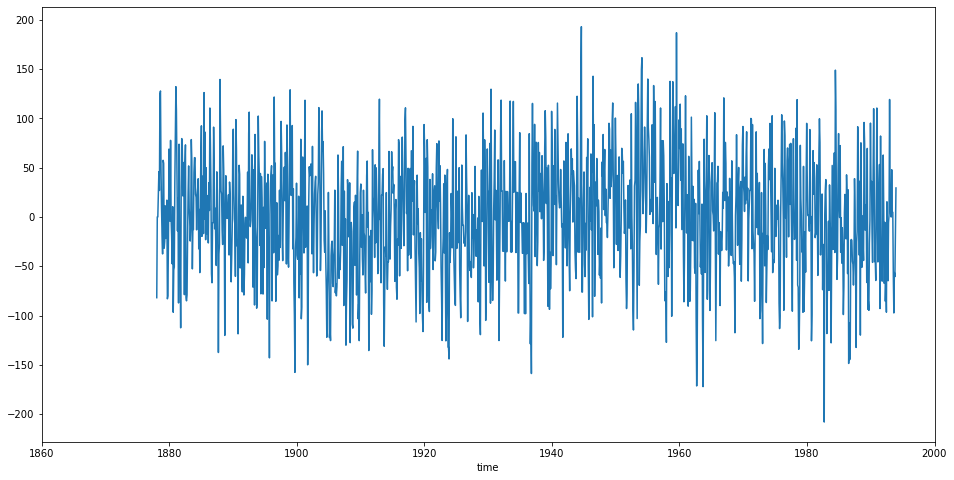

In [33]:
# Plotting detrended time series

f = plt.figure(figsize=(16,8))
detrend.plot()
plt.xlim(1860, 2000)

In [34]:
# Create a row for each month (12) & a column for each year
mo = detrend.values.reshape(12, int(L/12)) #float to integer

In [35]:
mo

array([[-8.19358909e+01,  7.47754516e-03, -4.91539646e-02, ...,
         4.56697733e+01,  2.66132776e+01, -1.84433539e+01],
       [-1.37499985e+02, -3.75564811e+01, -2.76131126e+01, ...,
        -1.88941853e+01, -4.39508169e+01,  2.69926874e+01],
       [-3.10639441e+01,  4.48794244e+01,  9.68229287e+01, ...,
        -5.34581440e+01, -3.45147755e+01,  2.94285930e+01],
       ...,
       [ 4.39880737e+01,  5.49314422e+01,  5.87481068e+00, ...,
        -3.54062620e+01,  1.02537242e+02, -5.65193893e+01],
       [-4.35760208e+01, -4.66325165e+01, -4.56891480e+01, ...,
        -3.29702207e+01,  2.39731478e+01,  6.49166521e+01],
       [-3.61399794e+01,  1.48803389e+02,  1.08746893e+02, ...,
        -6.05341794e+01, -1.55908109e+01,  2.93525576e+01]])

In [71]:
mo.shape

(12, 116)

In [36]:
# Seasonal (Annual) Cycle by averaging by months (all the Januaries, Febs, etc.)
cycle = mo.mean(axis=1) #average the rows

In [37]:
cycle

array([ 11.24138981,  -0.98640761,  -6.45558434, -14.20924266,
       -11.43704008,  -3.7510444 ,  10.57288348,  19.11232744,
         7.64315071,   4.19121652,  -5.18313262, -10.73851625])

In [72]:
cycle.shape

(12,)

In [38]:
max(cycle), min(cycle)

(19.112327440087068, -14.209242661242437)

In [39]:
#Calculate the amplitude
amp = (max(cycle)-min(cycle))/2

print('The amplitude of the seasonal cycle is', amp/10, 'cm')
print('On average, the sea level in Mumbai peaks in August at', max(cycle)/10, 'cm')

The amplitude of the seasonal cycle is 1.6660785050664753 cm
On average, the sea level in Mumbai peaks in August at 1.9112327440087067 cm


In [93]:
max_month0 = np.argmax(cycle, axis=0)

print(max_month0)

7


# f.) Same as (e) but separately for the first 5 years of the record and last 5 years of the record (note: use the same detrended time series as in (e), DO NOT detrend the first/last five years of data again)


In [172]:
# First 5 years
f5cycle = mo[:,0:5].mean(axis=1) # all the rows:(months), first 5 columns (years)
f5amp = (max(f5cycle)-min(f5cycle))/2

print('The amplitude of the average annual cycle from 1878-1882 is', f5amp/10, 'cm')
print('The sea level during the first 5 years of the record peaks in the month of May at', np.max(f5cycle), 'mm.')

The amplitude of the average annual cycle from 1878-1882 is 3.4663999401929955 cm
The sea level during the first 5 years of the record peaks in the month of May at 38.294875589075126 mm.


In [91]:
max_month = np.argmax(f5cycle, axis=0)

print(max_month)

4


In [173]:
# Last 5 years
l5cycle = mo[:,-5:].mean(axis=1) #last 5 columns
l5amp = (max(l5cycle)-min(l5cycle))/2

print('The amplitude of the last 5 years of the sea level record in Mumbai is', l5amp/10, 'cm')
print('The average sea level during the last 5 years of the record peaks in August at', np.max(l5cycle), 'mm.')

The amplitude of the last 5 years of the sea level record in Mumbai is 6.763600059807004 cm
The average sea level during the last 5 years of the record peaks in August at 92.12179107758693 mm.


In [92]:
max_month2 = np.argmax(l5cycle, axis=0)

print(max_month2)

7


In [42]:
print('First five years: ', f5cycle)
print('\n')
print('Last five years: ', l5cycle)

First five years:  [ -2.44909964   4.18688738  30.82287439  -2.14111143  38.29487559
  17.73086261 -31.03312321 -30.3971362   27.23885082  18.474865
 -16.88914798  31.54683903]


Last five years:  [ -3.93017237 -28.89418535 -32.85819833  23.37781585 -11.38619714
 -43.15021012  27.08580406  92.12179108 -23.64222191  10.39379227
  23.62977929 -40.13423369]


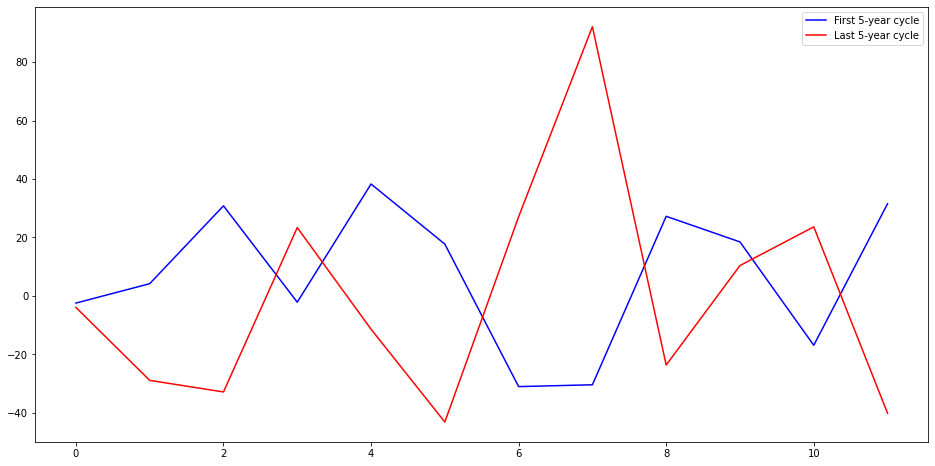

In [120]:
f = plt.figure(figsize=(16,8))

plt.plot(f5cycle, color='blue', label='First 5-year cycle')
plt.plot(l5cycle, color='red', label='Last 5-year cycle')

plt.legend(loc='best')

# g.) Identify the largest (positive or negative) monthly anomaly above or below the average seasonal cycle (Note: create a time series of the average seasonal cycle and subtract it from the raw data with linear trend removed)

In [43]:
# repeat the annual cycle for the entire record (to match the dimensions of x years)
# 116 years of data, so repeat seasonal cycle 116 times
rep_cycle = np.tile(cycle, int(L/len(cycle)))

In [44]:
rep_cycle

array([ 11.24138981,  -0.98640761,  -6.45558434, ...,   4.19121652,
        -5.18313262, -10.73851625])

In [75]:
rep_cycle.shape

(1392,)

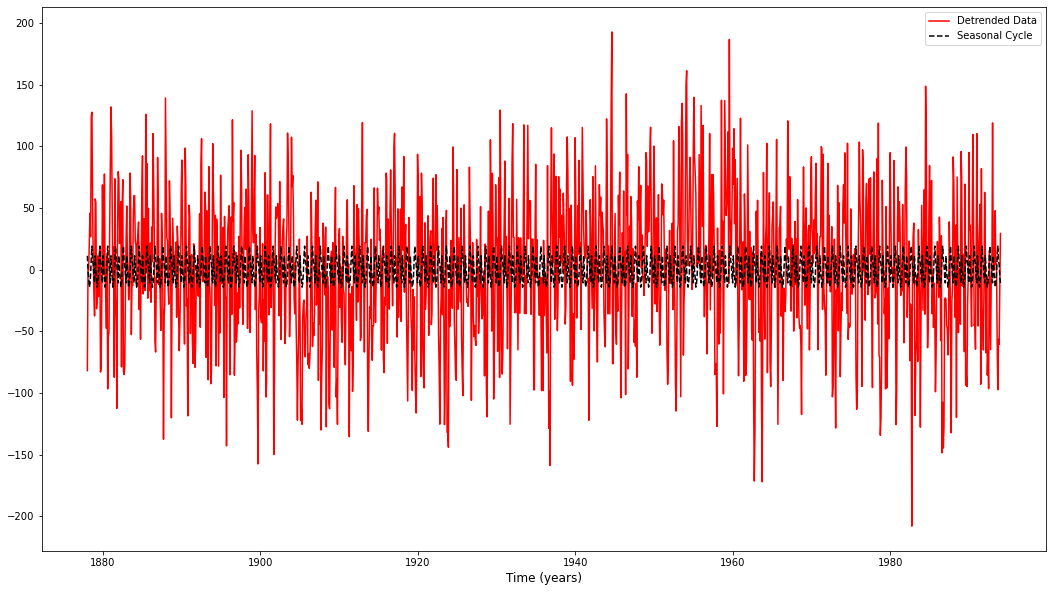

In [81]:
fig=plt.figure(figsize=(18,10))

plt.plot(t, detrend,color='red', label='Detrended Data')
plt.plot(t, rep_cycle,'--',color='black', label='Seasonal Cycle')

plt.xlabel("Time (years)", fontsize=12)

plt.legend()
plt.show()

In [46]:
# Time Series of Average Sea Level Annual Cycle
anomaly = detrend - rep_cycle

In [47]:
anomaly

time
1878.0416    -93.177281
1878.1250      0.993885
1878.2084      6.406430
1878.2916     38.103593
1878.3750     57.274759
                ...    
1993.6250   -116.533380
1993.7084    -64.120834
1993.7916    -64.725396
1993.8750    -10.407678
1993.9584     40.091074
Name: sea_level, Length: 1392, dtype: float64

In [48]:
anom_max = max(anomaly)
anom_min = min(anomaly)

print(anom_min, anom_max)

-215.65145059209047 176.1498821026891


In [49]:
print('The largest monthly anomaly is', min(anomaly))

The largest monthly anomaly is -215.65145059209047


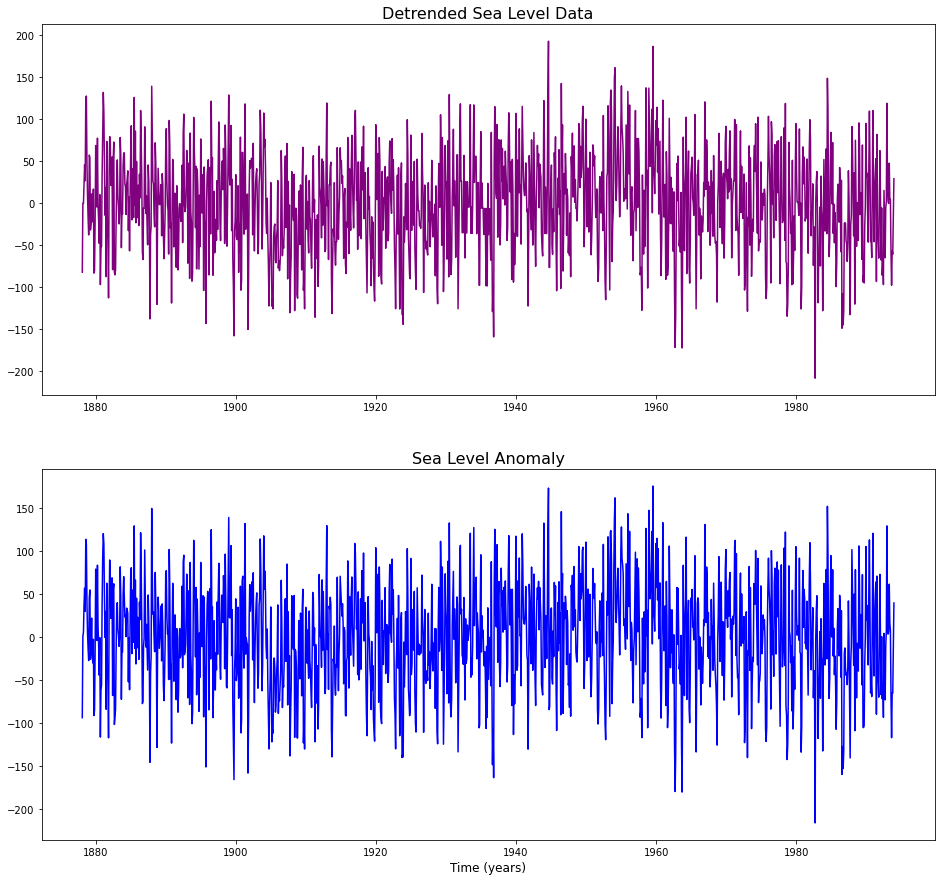

In [130]:
f, (ax1, ax2) = plt.subplots(2, figsize=(16,15))

ax1.plot(t, detrend, color = 'purple')
ax1.set_title('Detrended Sea Level Data', fontsize=16)

ax2.plot(t, anomaly, color = 'blue')
ax2.set_title('Sea Level Anomaly', fontsize=16)

plt.xlabel("Time (years)", fontsize=12)
#plt.tight_layout()
plt.show()

In [144]:
fig = px.scatter(x=t, y=detrend, trendline='ols', trendline_color_override='red',
                labels={'x': 'Time (years)'})

fig.show()

In [159]:
fig = px.scatter(x=t, y=anomaly, trendline='ols', trendline_color_override='red',
                labels={'x': 'Time (years)'})

fig.show()

# h.) Calculate the range of decadal variability (defined as difference between max and min value after applying an 8-year moving average to the raw data with the linear trend removed; note that raw data is given at monthly resolution)


### Apply 8-year moving average on detrended time series data and calculate the range of decadal variability

Create a function for checking the stationarity in the time series, applying moving average, calculating range of decadal variability and plotting the results

In [170]:

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling mean (moving average)
    rolmean = TS.rolling(window = 96, center = False).mean()  # 96 months = 8 years
    rol_mean = rolmean.dropna()
    max_rol = max(rol_mean)
    min_rol = min(rol_mean)
    dec_var = max_rol - min_rol
    print(rol_mean)
    print('\n')
    print('The decadel variability is: ', dec_var)
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS)  
    
    #Plot rolling mean (moving average):
    fig = plt.figure(figsize=(15,8))
    orig = plt.plot(TS, color='blue',label='Detreded TS')
    mean = plt.plot(rolmean, color='red', label='8-Year Moving Average')
    plt.legend(loc='best')
    plt.title('Detrended Time Series with 8-Year Moving Average', fontsize=20) 
    plt.xlabel('Time (years)', fontsize=16)
    #plt.ylabel('Mean Sea Level', fontsize=16)
    plt.tick_params(labelsize=12);
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')


    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

time
1885.9584    11.178301
1886.0416    12.257131
1886.1250    11.981795
1886.2084    12.341875
1886.2916    12.160289
               ...    
1993.6250   -14.014456
1993.7084   -13.571042
1993.7916   -13.471378
1993.8750   -13.673798
1993.9584   -13.605384
Name: sea_level, Length: 1297, dtype: float64


The decadel variability is:  65.42829915202478


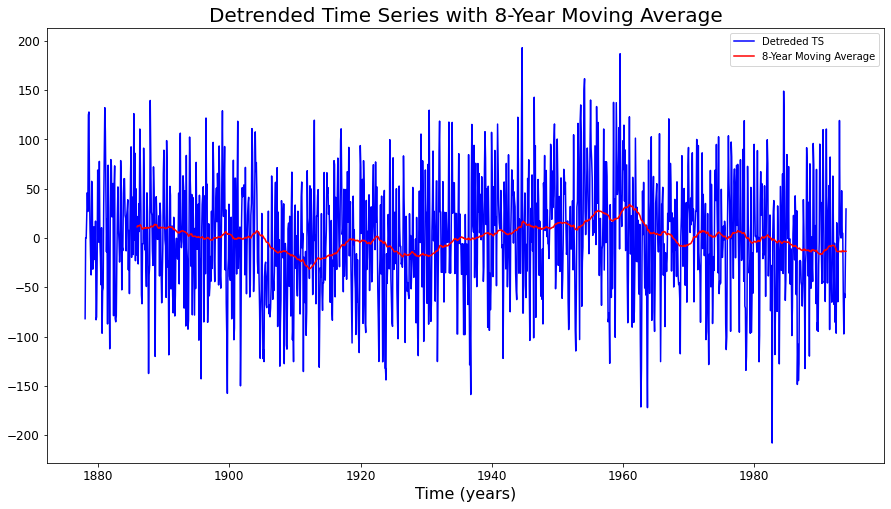

Results of Dickey-Fuller Test:
Test Statistic                -5.801427e+00
p-value                        4.621320e-07
#Lags Used                     2.400000e+01
Number of Observations Used    1.367000e+03
Critical Value (1%)           -3.435143e+00
Critical Value (5%)           -2.863657e+00
Critical Value (10%)          -2.567897e+00
dtype: float64


In [171]:
# Check the stationarity and plot the detredend and 8-year moving average
stationarity_check(detrend)

# Decompose the time series

Text(0.5, 0, 'Time (years)')

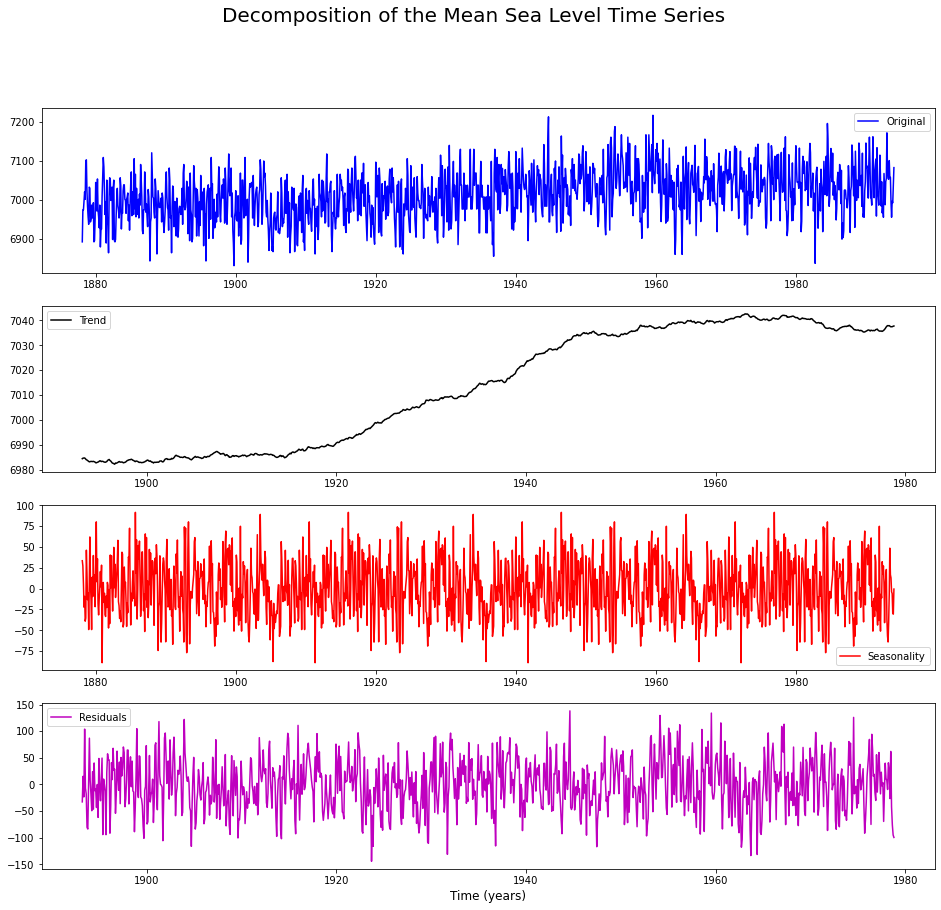

In [198]:
result = seasonal_decompose(data['sea_level'], model='additive', period=365) 

trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot gathered statistics
#plt.rcParams['figure.figsize'] = (16, 9)
f = plt.figure(figsize=(16,14))

plt.suptitle("Decomposition of the Mean Sea Level Time Series", fontsize=20)

plt.subplot(411)
plt.plot(data, label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color="black")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="red")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color="m")
plt.legend(loc='best')

plt.xlabel("Time (years)", fontsize=12)

#plt.tight_layout()


### Decomposition of detrended time series

Text(0.5, 0, 'Time (years)')

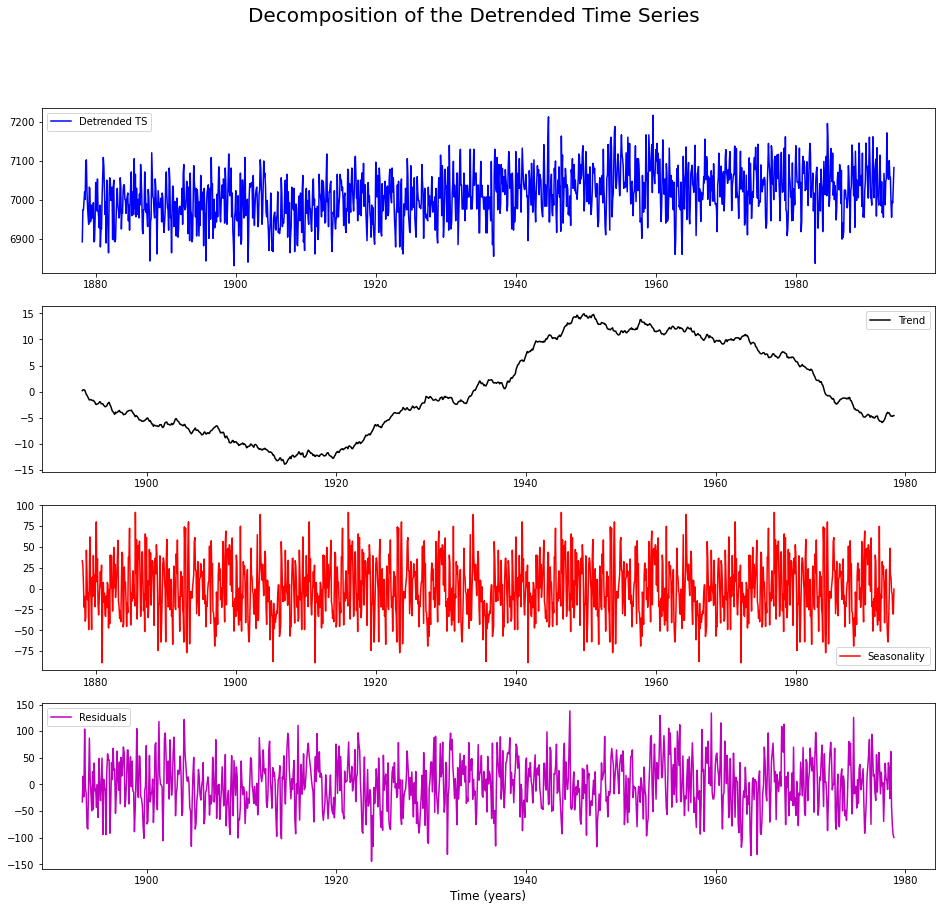

In [201]:
result2 = seasonal_decompose(detrend, model='additive', period=365) 

trend2 = result2.trend
seasonal2 = result2.seasonal
residual2 = result2.resid

# Plot gathered statistics
#plt.rcParams['figure.figsize'] = (16, 10)
f = plt.figure(figsize=(16,14))

plt.suptitle("Decomposition of the Detrended Time Series", fontsize=20)

plt.subplot(411)
plt.plot(data, label='Detrended TS', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend2, label='Trend', color="black")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal2,label='Seasonality', color="red")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual2, label='Residuals', color="m")
plt.legend(loc='best')

plt.xlabel("Time (years)", fontsize=12)

#plt.tight_layout()


# i.) Produce a plot of the raw data with linear trend and quadratic trend in the same panel

The linear parameters are, a = 0.6790348891892354 b = 5698.680121196309
The acceleration of the sea level rise in Mumbai is -0.0025770161867270584 mm/yr^2
The quadratic parameters are [-1.28850809e-03  5.66813823e+00  8.70672937e+02]


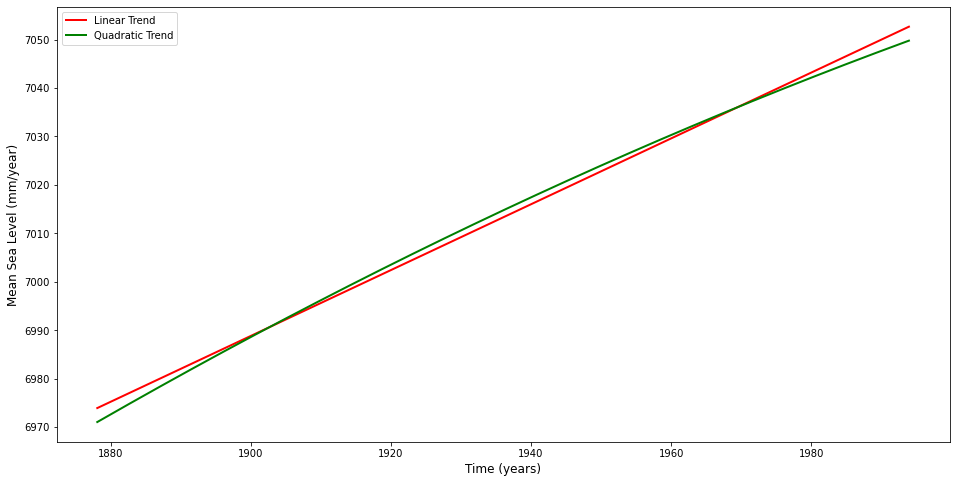

In [190]:
# Linear trend
parameters = np.polyfit(data.index.values, data['sea_level'], deg = 1) 
(a,b) = parameters
trend = a*data.index.values + b
print('The linear parameters are, a =', a, 'b =', b)


# Quadratic trend 
para_quad = np.polyfit(t,s, deg = 2) 
(aq,bq,cq) = para_quad
acceleration = 2*aq
print('The acceleration of the sea level rise in Mumbai is', acceleration, 'mm/yr^2')

quad_trend = aq*(t**2) + bq*t +cq
print('The quadratic parameters are', para_quad)


# Plot linear and quadratic trends
f = plt.figure(figsize=(16,8))

#plt.plot(data.index.values, data['sea_level'], color='grey')
plt.plot(data.index.values, trend, label='Linear Trend', color ='red', linewidth=2)

plt.plot(t, quad_trend, label ='Quadratic Trend', color='green', linewidth=2)

plt.xlabel("Time (years)", fontsize=12)
plt.ylabel("Mean Sea Level (mm/year)", fontsize=12)
plt.legend(loc='best')

plt.show()

# j.) Produce a plot with the de-trended raw data (i.e. linear trend removed) and 8-year moving average in the same panel

The decadel variability is:  65.42829915202478


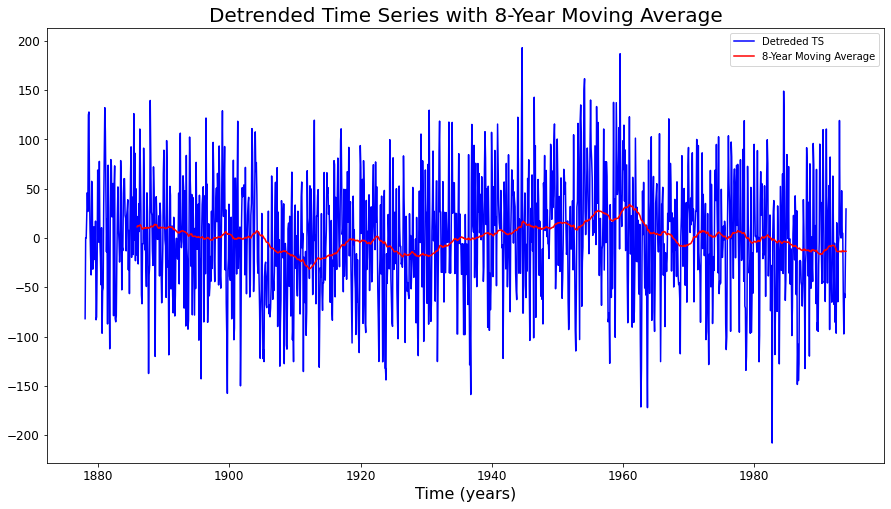

Results of Dickey-Fuller Test:
Test Statistic                -5.801427e+00
p-value                        4.621320e-07
#Lags Used                     2.400000e+01
Number of Observations Used    1.367000e+03
Critical Value (1%)           -3.435143e+00
Critical Value (5%)           -2.863657e+00
Critical Value (10%)          -2.567897e+00
dtype: float64


In [56]:
stationarity_check(detrend)